# DATA EXPLORATION AND EDA

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [76]:
# Load the datasets
high_df = pd.read_csv('high_popularity_spotify_data.csv')
low_df = pd.read_csv('low_popularity_spotify_data.csv')

In [77]:
high_df.isnull().sum()

energy                      0
tempo                       0
danceability                0
playlist_genre              0
loudness                    0
liveness                    0
valence                     0
track_artist                0
time_signature              0
speechiness                 0
track_popularity            0
track_href                  0
uri                         0
track_album_name            1
playlist_name               0
analysis_url                0
track_id                    0
track_name                  0
track_album_release_date    0
instrumentalness            0
track_album_id              0
mode                        0
key                         0
duration_ms                 0
acousticness                0
id                          0
playlist_subgenre           0
type                        0
playlist_id                 0
dtype: int64

In [78]:
low_df.isnull().sum()

time_signature              1
track_popularity            0
speechiness                 1
danceability                1
playlist_name               0
track_artist                0
duration_ms                 1
energy                      1
playlist_genre              0
playlist_subgenre           0
track_href                  1
track_name                  0
mode                        1
uri                         1
type                        1
track_album_release_date    0
analysis_url                1
id                          1
instrumentalness            1
track_album_id              0
playlist_id                 0
track_id                    0
valence                     1
key                         1
tempo                       1
loudness                    1
acousticness                1
liveness                    1
track_album_name            0
dtype: int64

In [79]:
high_df.duplicated().sum()

np.int64(0)

In [80]:
low_df.duplicated().sum()

np.int64(0)

In [81]:
high_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    1686 non-null   float64
 1   tempo                     1686 non-null   float64
 2   danceability              1686 non-null   float64
 3   playlist_genre            1686 non-null   object 
 4   loudness                  1686 non-null   float64
 5   liveness                  1686 non-null   float64
 6   valence                   1686 non-null   float64
 7   track_artist              1686 non-null   object 
 8   time_signature            1686 non-null   int64  
 9   speechiness               1686 non-null   float64
 10  track_popularity          1686 non-null   int64  
 11  track_href                1686 non-null   object 
 12  uri                       1686 non-null   object 
 13  track_album_name          1685 non-null   object 
 14  playlist

In [82]:
low_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3145 entries, 0 to 3144
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time_signature            3144 non-null   float64
 1   track_popularity          3145 non-null   int64  
 2   speechiness               3144 non-null   float64
 3   danceability              3144 non-null   float64
 4   playlist_name             3145 non-null   object 
 5   track_artist              3145 non-null   object 
 6   duration_ms               3144 non-null   float64
 7   energy                    3144 non-null   float64
 8   playlist_genre            3145 non-null   object 
 9   playlist_subgenre         3145 non-null   object 
 10  track_href                3144 non-null   object 
 11  track_name                3145 non-null   object 
 12  mode                      3144 non-null   float64
 13  uri                       3144 non-null   object 
 14  type    

In [100]:
# Add labels
high_df['popularity'] = 1  # High
low_df['popularity'] = 0   # Low

# Combine
df = pd.concat([high_df, low_df], ignore_index=True)

# Common audio features (adjust if cols differ)
audio_features = ['energy', 'tempo', 'danceability', 'loudness', 'liveness', 'valence', 
                    'speechiness',  'instrumentalness', 'acousticness', 
                    'mode', 'key', 'duration_ms', 'time_signature']
df[audio_features] = df[audio_features].fillna(df[audio_features].mean())

# Keep only relevant columns
df = df[audio_features + ['popularity'] + ['playlist_genre']]  


df.head()

,energy,tempo,danceability,loudness,liveness,valence,speechiness,instrumentalness,acousticness,mode,key,duration_ms,time_signature,popularity,playlist_genre
0,0.592,157.969,0.521,-7.777,0.122,0.535,0.0304,0.0000,0.3080,0.0,6.0,251668.0,3.0,1,pop
1,0.507,104.978,0.747,-10.171,0.117,0.438,0.0358,0.0608,0.2000,1.0,2.0,210373.0,4.0,1,pop
2,0.808,108.548,0.554,-4.169,0.159,0.372,0.0368,0.0000,0.2140,1.0,1.0,166300.0,4.0,1,pop
3,0.910,112.966,0.670,-4.070,0.304,0.786,0.0634,0.0000,0.0939,0.0,0.0,157280.0,4.0,1,pop
4,0.783,149.027,0.777,-4.477,0.355,0.939,0.2600,0.0000,0.0283,0.0,0.0,169917.0,4.0,1,pop


In [84]:
# Grouped stats
grouped = df.groupby('popularity')[audio_features].agg(['mean', 'std', 'min', 'max']).round(3)
grouped

energy                         tempo                           \
             mean    std    min    max     mean     std     min      max   
popularity                                                                 
0           0.544  0.264  0.000  0.998  116.767  29.148  48.232  241.426   
1           0.667  0.185  0.002  0.990  121.071  27.066  49.305  209.688   

           danceability         ...  key       duration_ms             \
                   mean    std  ...  min   max        mean        std   
popularity                      ...                                     
0                 0.607  0.200  ...  0.0  11.0  201641.609  91559.374   
1                 0.650  0.158  ...  0.0  11.0  214562.126  58310.748   

                               time_signature                   
                min        max           mean    std  min  max  
popularity                                                      
0           35375.0  1355260.0          3.929  0.448  1.0  5.0  
1           61673.0   547107.0          3.950  0.327  1.0  5.0  

[2 rows x 52 columns]

In [85]:
# Or pivot for easier reading
print("\nMean by Popularity:")
means = df.groupby('popularity')[audio_features].mean().round(3)
means


Mean by Popularity:


,energy,tempo,danceability,loudness,liveness,valence,speechiness,instrumentalness,acousticness,mode,key,duration_ms,time_signature
popularity,,,,,,,,,,,,,
0,0.544,116.767,0.607,-10.663,0.165,0.458,0.102,0.287,0.406,0.553,5.177,201641.609,3.929
1,0.667,121.071,0.650,-6.704,0.172,0.526,0.101,0.042,0.221,0.578,5.338,214562.126,3.950


In [86]:
df.describe()

,energy,tempo,danceability,loudness,liveness,valence,speechiness,instrumentalness,acousticness,mode,key,duration_ms,time_signature,popularity
count,4831.000000,4831.000000,4831.000000,4831.000000,4831.000000,4831.00000,4831.000000,4831.000000,4831.000000,4831.000000,4831.000000,4.831000e+03,4831.000000,4831.000000
mean,0.586691,118.269293,0.622311,-9.281627,0.167613,0.48193,0.101738,0.201053,0.341217,0.562112,5.233333,2.061508e+05,3.936646,0.348996
std,0.246237,28.509664,0.187686,7.128658,0.124417,0.25801,0.101021,0.351882,0.325348,0.496127,3.580486,8.173709e+04,0.409669,0.476702
min,0.000202,48.232000,0.058900,-48.069000,0.021000,0.02960,0.021900,0.000000,0.000004,0.000000,0.000000,3.537500e+04,1.000000,0.000000
25%,0.442500,96.063000,0.525000,-10.297500,0.095400,0.27500,0.038600,0.000000,0.052950,0.000000,2.000000,1.590000e+05,4.000000,0.000000
50%,0.633000,118.068000,0.653000,-7.191000,0.118000,0.48300,0.056100,0.000092,0.225000,1.000000,5.000000,1.948800e+05,4.000000,0.000000
75%,0.777000,136.715000,0.758000,-5.337500,0.195000,0.69000,0.118000,0.201000,0.590000,1.000000,8.000000,2.334780e+05,4.000000,1.000000
max,0.998000,241.426000,0.979000,1.318000,0.979000,0.98700,0.927000,0.991000,0.996000,1.000000,11.000000,1.355260e+06,5.000000,1.000000


In [87]:
df.isnull().sum()

energy              0
tempo               0
danceability        0
loudness            0
liveness            0
valence             0
speechiness         0
instrumentalness    0
acousticness        0
mode                0
key                 0
duration_ms         0
time_signature      0
popularity          0
playlist_genre      0
dtype: int64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4831 entries, 0 to 4830
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   energy            4831 non-null   float64
 1   tempo             4831 non-null   float64
 2   danceability      4831 non-null   float64
 3   loudness          4831 non-null   float64
 4   liveness          4831 non-null   float64
 5   valence           4831 non-null   float64
 6   speechiness       4831 non-null   float64
 7   instrumentalness  4831 non-null   float64
 8   acousticness      4831 non-null   float64
 9   mode              4831 non-null   float64
 10  key               4831 non-null   float64
 11  duration_ms       4831 non-null   float64
 12  time_signature    4831 non-null   float64
 13  popularity        4831 non-null   int64  
 14  playlist_genre    4831 non-null   object 
dtypes: float64(13), int64(1), object(1)
memory usage: 566.3+ KB


In [89]:
df.duplicated().sum()

np.int64(118)

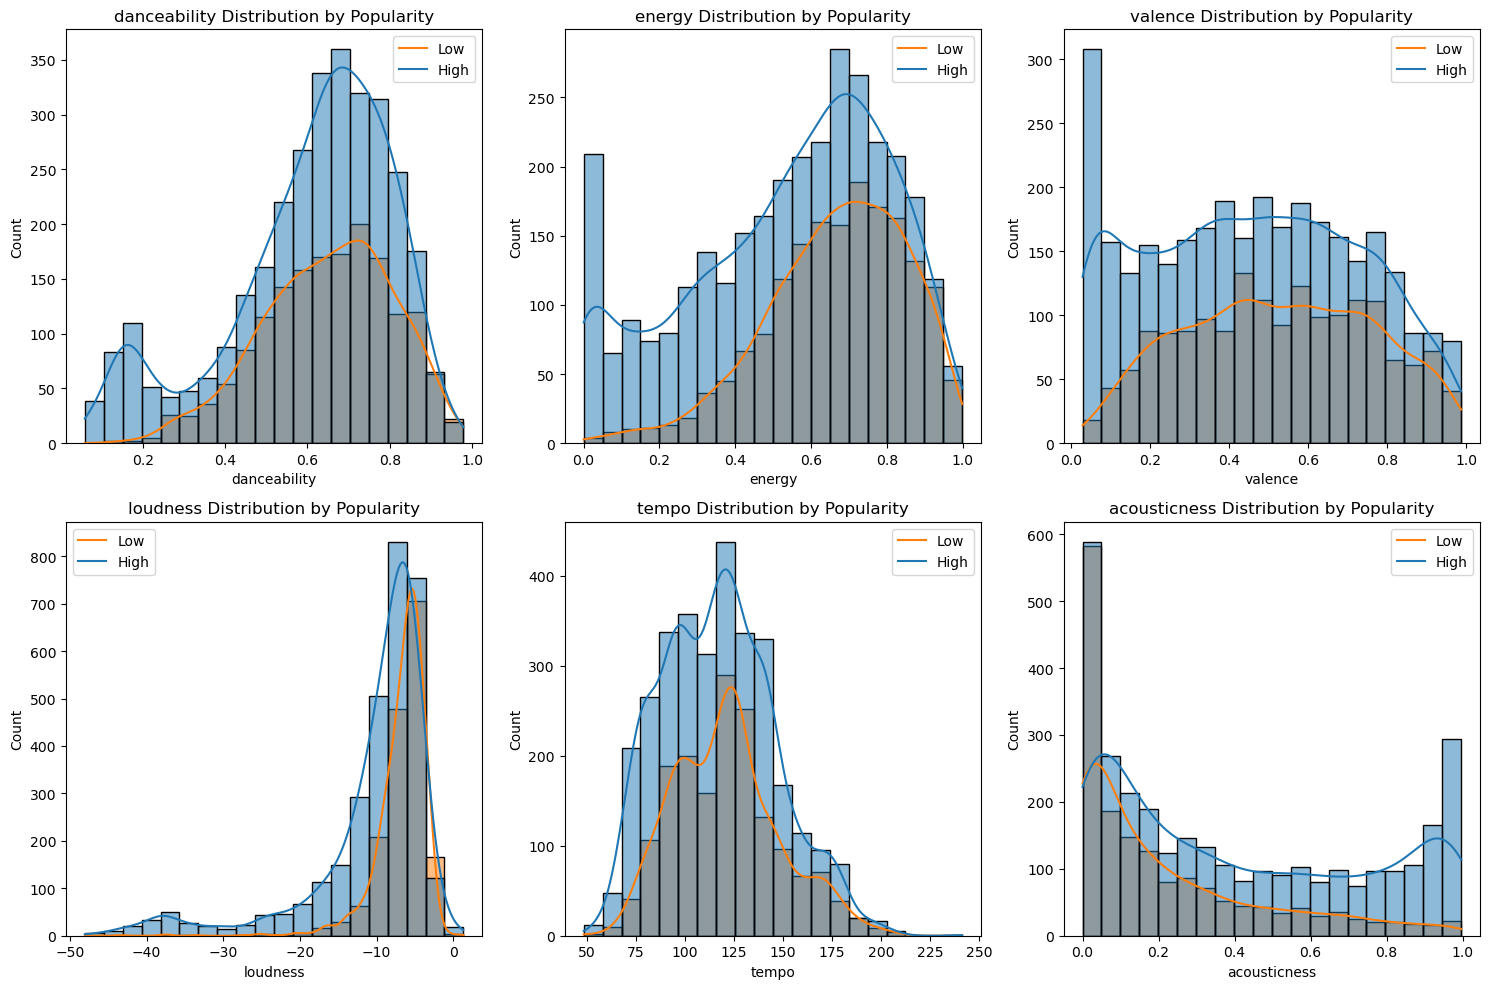

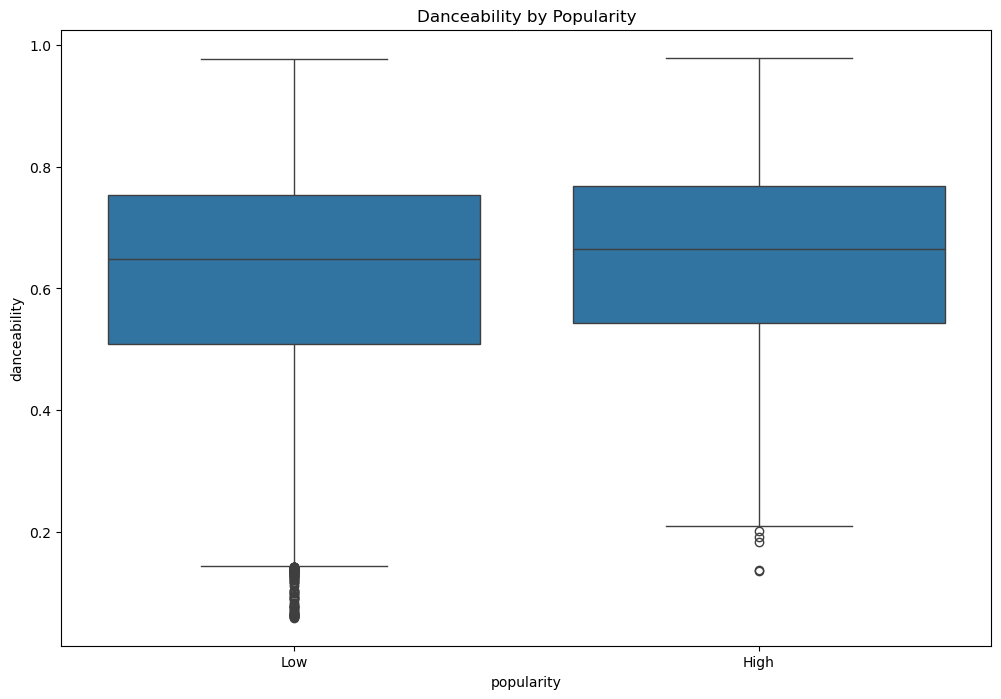

In [90]:
# Histograms for key features (subplots)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
features_to_plot = ['danceability', 'energy', 'valence', 'loudness', 'tempo', 'acousticness']

for i, feat in enumerate(features_to_plot):
    row, col = i // 3, i % 3
    sns.histplot(data=df, x=feat, hue='popularity', kde=True, ax=axes[row, col], bins=20)
    axes[row, col].set_title(f'{feat} Distribution by Popularity')
    axes[row, col].legend(labels=['Low', 'High'])

plt.tight_layout()
plt.show()

# Boxplot for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='popularity', y='danceability')
plt.title('Danceability by Popularity')
plt.xticks([0,1], ['Low', 'High'])
plt.show()

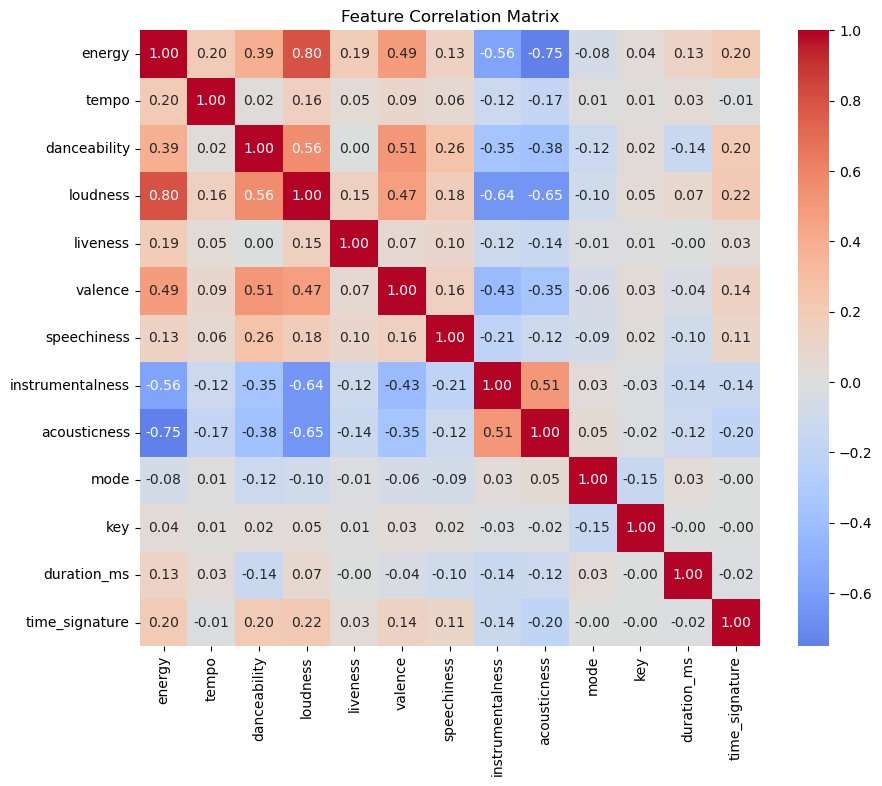

Correlations with Popularity:
loudness            0.265
energy              0.239
valence             0.124
danceability        0.109
duration_ms         0.075
tempo               0.072
time_signature      0.024
mode                0.024
liveness            0.023
key                 0.021
speechiness        -0.006
acousticness       -0.270
instrumentalness   -0.332
dtype: float64


In [91]:
# Correlation matrix (numeric features only)
numeric_df = df[audio_features].select_dtypes(include=[np.number])
corr = numeric_df.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

# Correlation with popularity
print("Correlations with Popularity:")
print(df[audio_features].corrwith(df['popularity']).sort_values(ascending=False).round(3))

popularity        0    1
playlist_genre          
afrobeats        62   20
ambient         298   61
arabic          158   50
blues            43   45
brazilian       134   14
cantopop         27    0
classical       111   10
country           8    3
disco             9    0
electronic      441  148
folk             35   33
funk             28    0
gaming           33  100
gospel           39    0
hip-hop         168  227
indian           48    9
indie            13    4
j-pop            12   11
jazz            145    1
k-pop             6   11
korean           26    8
latin           241  184
lofi            297    2
mandopop         14    0
metal            14   35
pop             158  357
punk             24   50
r&b               0   50
reggae           19    5
rock            110  235
soca             14    0
soul             42    2
turkish          64    7
wellness         80    0
world           224    4


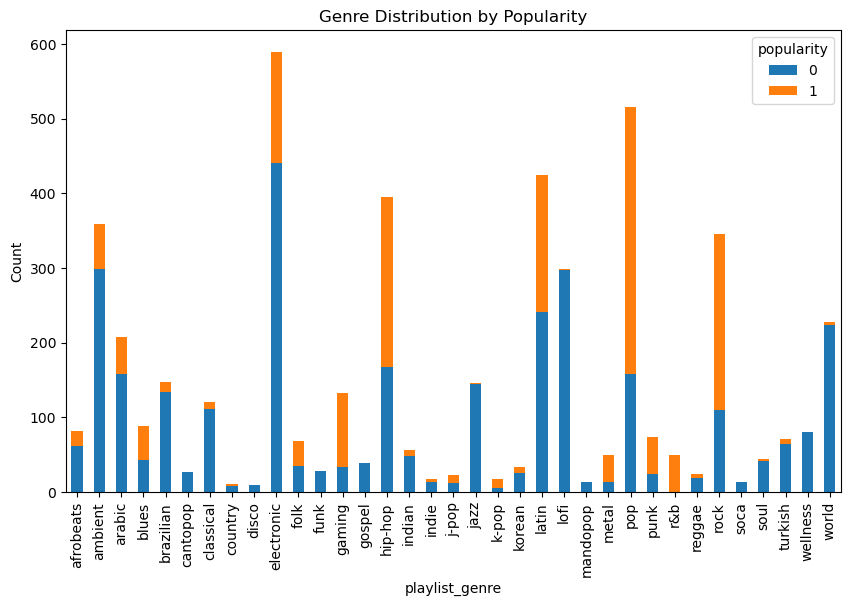

In [92]:
if 'playlist_genre' in df.columns:
    genre_dist = df.groupby(['playlist_genre', 'popularity']).size().unstack(fill_value=0)
    print(genre_dist)
    
    # Plot
    genre_dist.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title('Genre Distribution by Popularity')
    plt.ylabel('Count')
    plt.show()

In [93]:
# Simple outlier check (IQR for danceability)
Q1 = df['danceability'].quantile(0.25)
Q3 = df['danceability'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['danceability'] < Q1 - 1.5*IQR) | (df['danceability'] > Q3 + 1.5*IQR)]
print(f"Outliers in Danceability: {len(outliers)}")

# Save combined data for next notebook
df.to_csv('combined_spotify_data.csv', index=False)
print("Data saved!")

Outliers in Danceability: 191
Data saved!


### Imbalance: If low > high, plan oversampling.
### Key diffs: High pop = more danceable, energetic, less acoustic.



<Axes: xlabel='energy', ylabel='valence'>

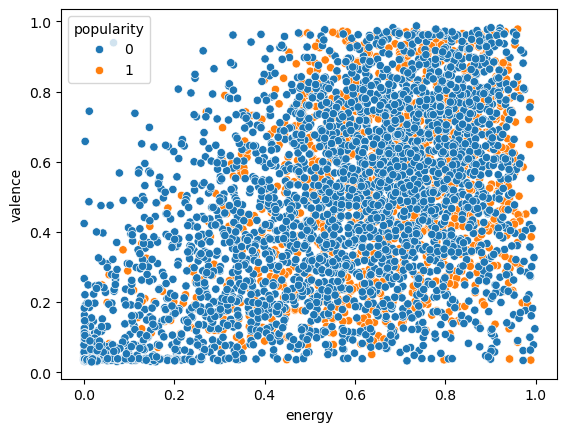

In [95]:
sns.scatterplot(data=df, x='energy', y='valence',hue='popularity')

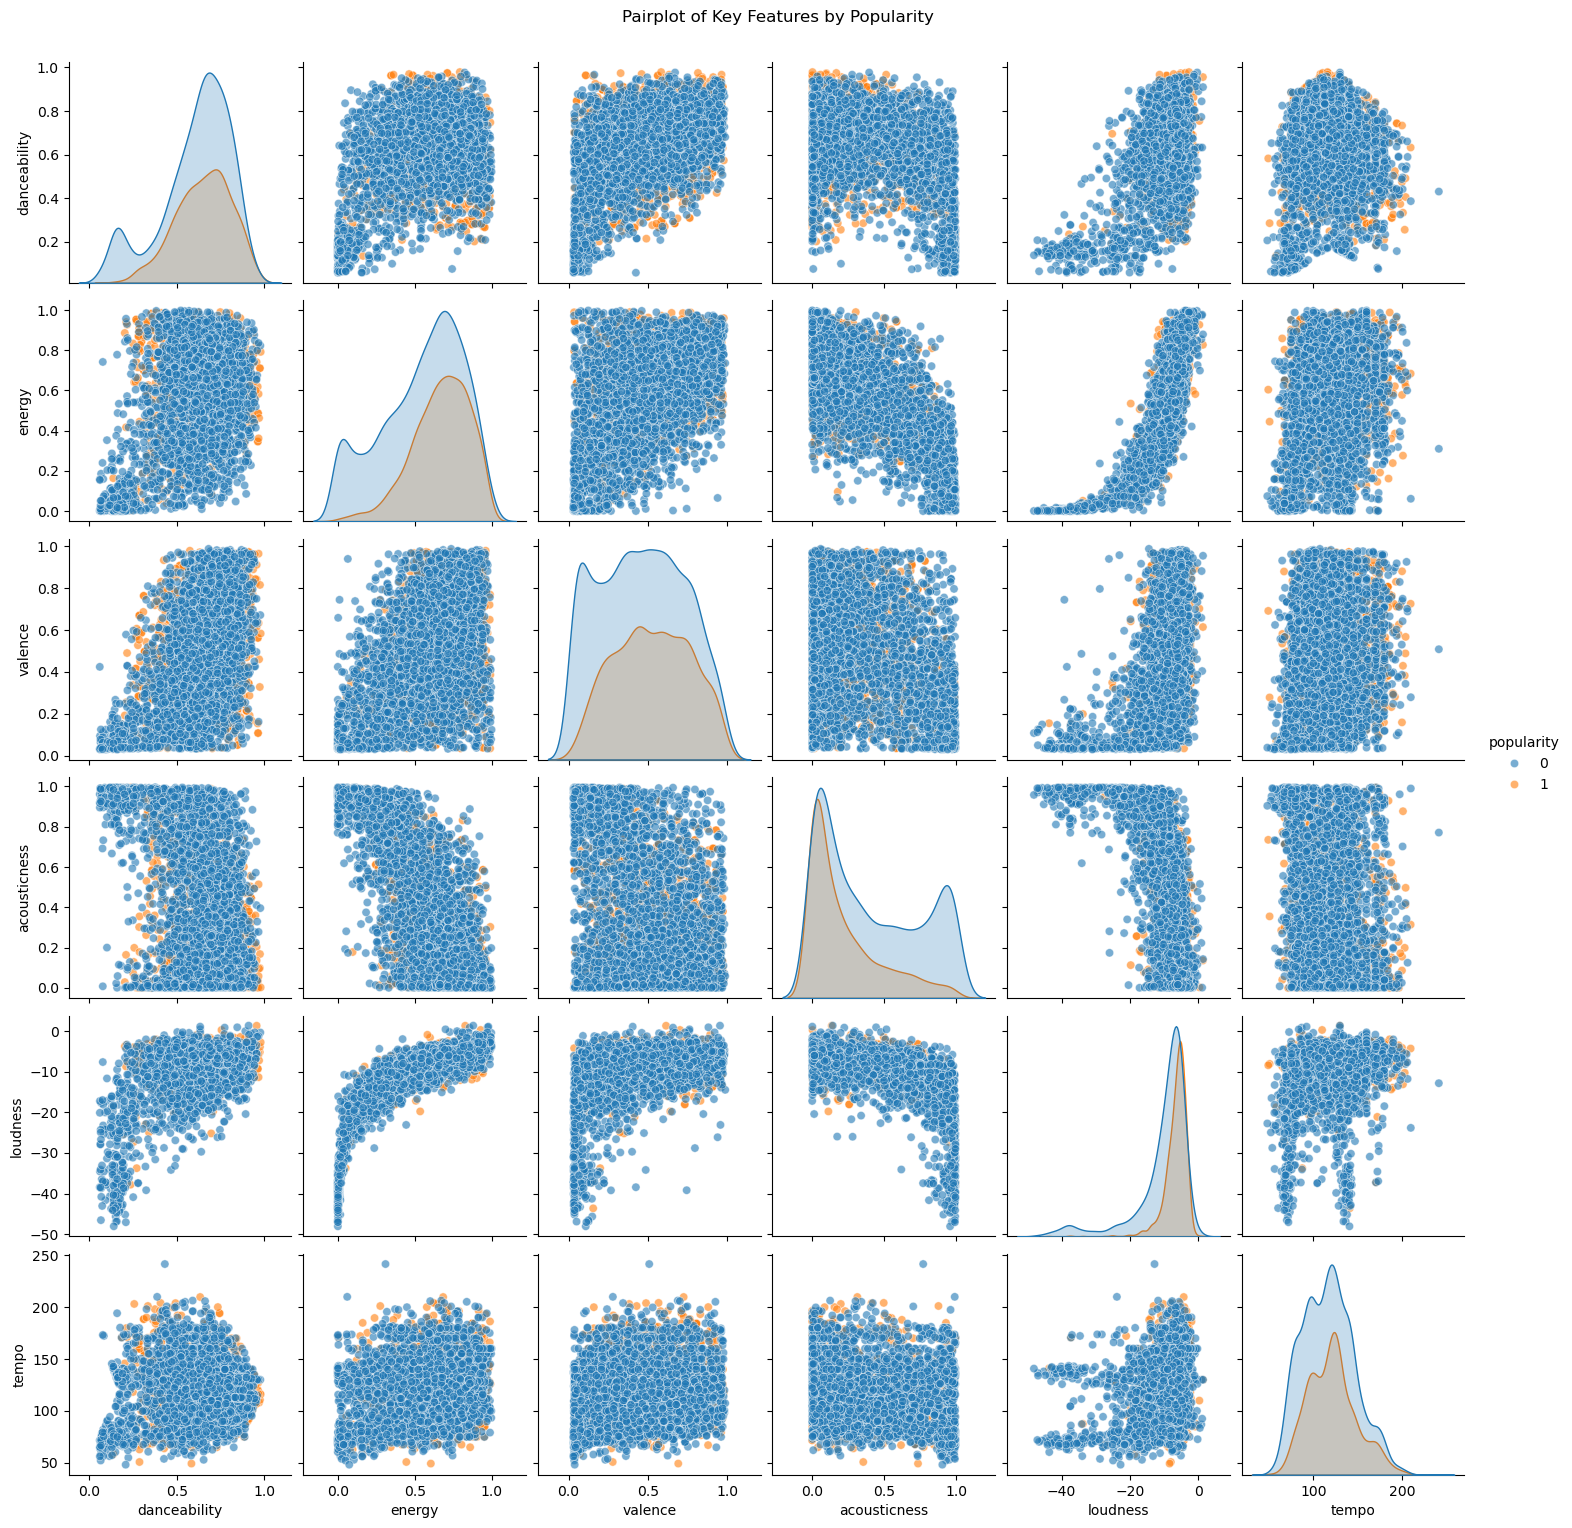

In [96]:
# Select top features for pairplot (limit to 6-8 to avoid clutter)
top_features = ['danceability', 'energy', 'valence', 'acousticness', 'loudness', 'tempo', 'popularity']

# Pairplot
sns.pairplot(df[top_features], hue='popularity', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Key Features by Popularity', y=1.02)
plt.show()

C:\Users\uzebk\AppData\Local\Temp\ipykernel_4632\3367125677.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(['Low', 'High'])
C:\Users\uzebk\AppData\Local\Temp\ipykernel_4632\3367125677.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(['Low', 'High'])
C:\Users\uzebk\AppData\Local\Temp\ipykernel_4632\3367125677.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(['Low', 'High'])
C:\Users\uzebk\AppData\Local\Temp\ipykernel_4632\3367125677.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(['Low', 'High'])
C:\Users\uzebk\AppData\L

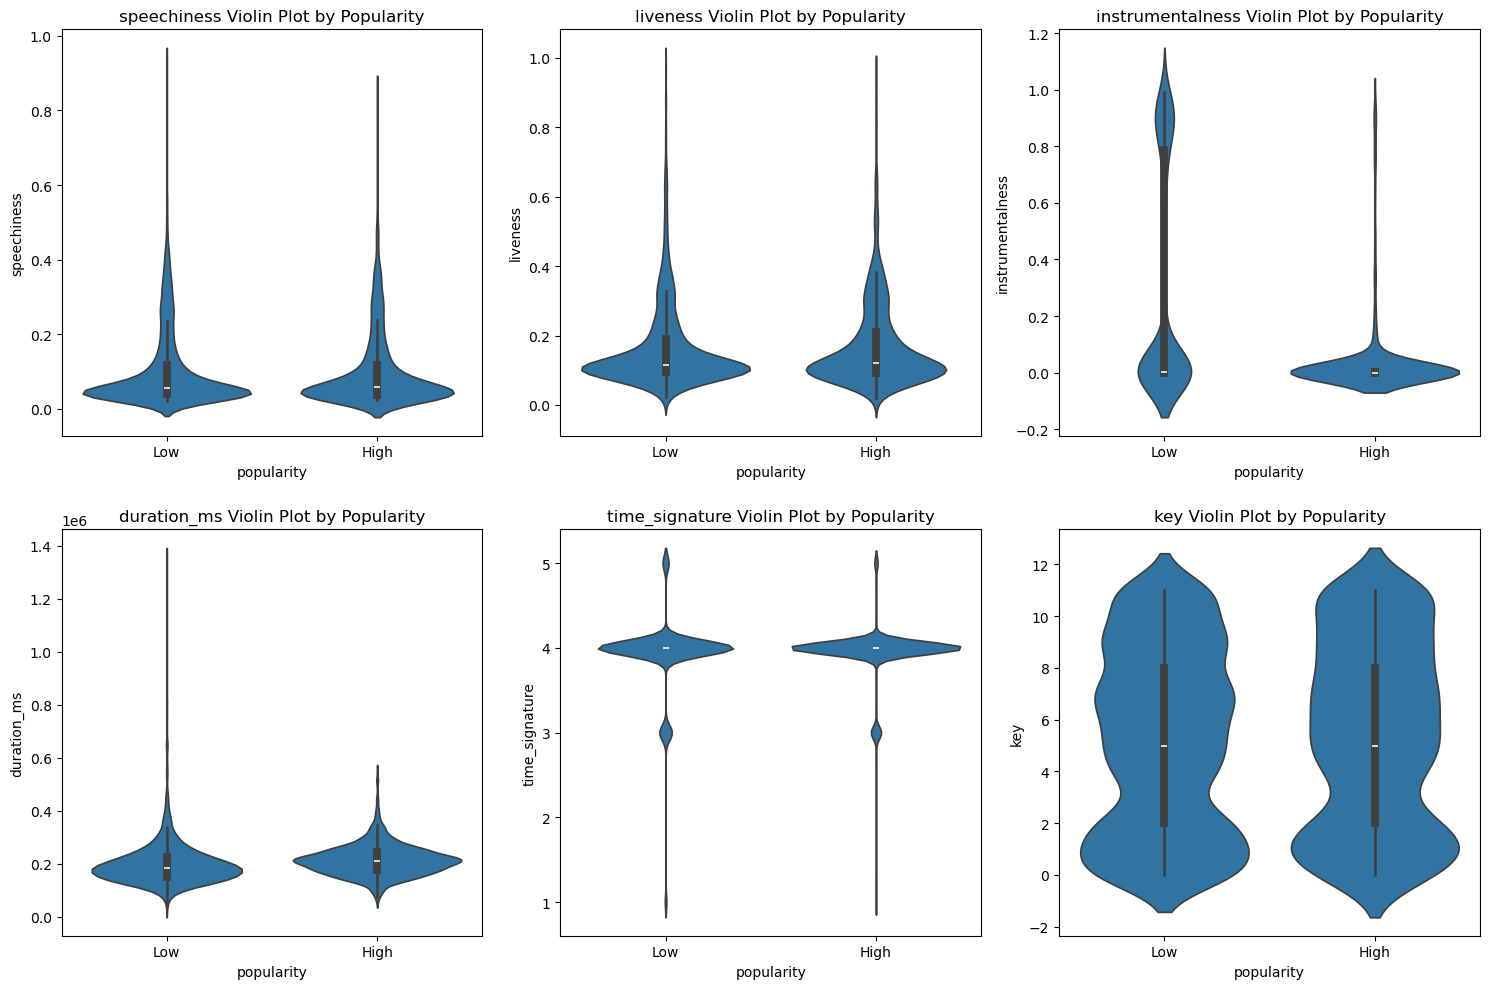

In [97]:
# Violin plots for selected features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
violin_features = ['speechiness', 'liveness', 'instrumentalness', 'duration_ms', 'time_signature', 'key']

for i, feat in enumerate(violin_features):
    row, col = i // 3, i % 3
    sns.violinplot(data=df, x='popularity', y=feat, ax=axes[row, col])
    axes[row, col].set_title(f'{feat} Violin Plot by Popularity')
    axes[row, col].set_xticklabels(['Low', 'High'])

plt.tight_layout()
plt.show()

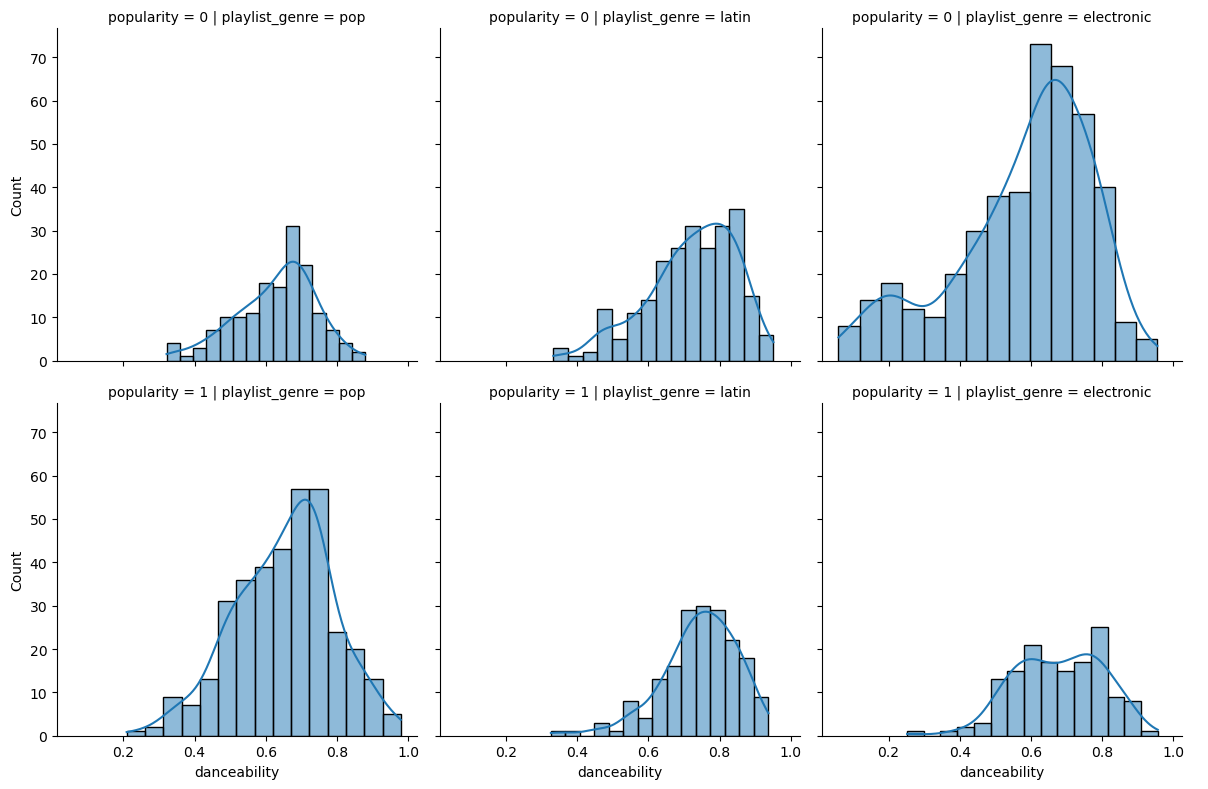

Danceability Means by Genre & Pop:
 playlist_genre  popularity
electronic      0             0.579165
                1             0.677419
latin           0             0.721564
                1             0.744060
pop             0             0.628171
                1             0.652067
Name: danceability, dtype: float64


In [98]:
# Assuming 'playlist_genre' is in df; filter to common genres if many
if 'playlist_genre' in df.columns:
    common_genres = df['playlist_genre'].value_counts().head(3).index  # Top 3
    genre_df = df[df['playlist_genre'].isin(common_genres)]
    
    # Facet grid for danceability by genre and pop
    g = sns.FacetGrid(genre_df, col='playlist_genre', row='popularity', height=4)
    g.map(sns.histplot, 'danceability', bins=15, kde=True)
    g.add_legend()
    plt.show()
    
    print("Danceability Means by Genre & Pop:\n", genre_df.groupby(['playlist_genre', 'popularity'])['danceability'].mean())

In [99]:
from scipy.stats import ttest_ind

# Test for key features
signif_features = []
for feat in ['danceability', 'energy', 'acousticness', 'valence']:
    high_vals = df[df['popularity'] == 1][feat].dropna()
    low_vals = df[df['popularity'] == 0][feat].dropna()
    t_stat, p_val = ttest_ind(high_vals, low_vals)
    signif = '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*' if p_val < 0.05 else 'ns'
    print(f"{feat}: t={t_stat:.2f}, p={p_val:.3f} {signif}")
    if p_val < 0.05:
        signif_features.append(feat)

print(f"\nSignificantly Different Features: {signif_features}")

danceability: t=7.65, p=0.000 ***
energy: t=17.14, p=0.000 ***
acousticness: t=-19.49, p=0.000 ***
valence: t=8.71, p=0.000 ***

Significantly Different Features: ['danceability', 'energy', 'acousticness', 'valence']
